In [23]:
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.io
def get_pi_times(transitions,matrix):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
        col_labels = [-2, -1, 0, 1, 2]
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
        # Find the index of the column label
        col_index = col_labels.index(col_label)
        
        if row_index is not None and col_index in range(len(col_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list

data = scipy.io.loadmat('sensitivity_matrix_4p216G.mat')

# Access the matrix stored in the .mat file
sensitivityMatrix = data['S']  # Replace 'A' with the actual variable name in your .mat file

print(np.round(sensitivityMatrix,6))


[[ 4.572991e+00  3.870464e+00  3.168970e+00  2.468506e+00  1.769067e+00]
 [ 1.746720e+00  1.044193e+00  3.426990e-01 -3.577660e-01 -1.057204e+00]
 [-1.242980e+00 -1.945507e+00 -2.647001e+00 -3.347465e+00 -4.046903e+00]
 [ 4.661385e+00  3.958858e+00  3.257364e+00  2.556900e+00  1.857461e+00]
 [ 3.008396e+00  2.305869e+00  1.604375e+00  9.039110e-01  2.044730e-01]
 [ 1.404079e+00  7.015520e-01  5.800000e-05 -7.004060e-01 -1.399844e+00]
 [-1.140040e-01 -8.165310e-01 -1.518025e+00 -2.218489e+00 -2.917928e+00]
 [-1.472447e+00 -2.174974e+00 -2.876468e+00 -3.576933e+00 -4.276371e+00]
 [ 5.600782e+00  4.898255e+00  4.196761e+00  3.496296e+00  2.796858e+00]
 [ 4.605347e+00  3.902820e+00  3.201326e+00  2.500861e+00  1.801423e+00]
 [ 3.542212e+00  2.839685e+00  2.138191e+00  1.437726e+00  7.382880e-01]
 [ 2.440196e+00  1.737669e+00  1.036175e+00  3.357100e-01 -3.637280e-01]
 [ 1.306621e+00  6.040940e-01 -9.740000e-02 -7.978640e-01 -1.497303e+00]
 [ 1.331020e-01 -5.694250e-01 -1.270919e+00 -1.9713

In [25]:
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.io

def read_t2_data(filename):
    triplets = []
    T2_eff_list = []
    sigma_T2_eff_list = []
    T2_G_list = []
    T2_L_list = []

    # Updated pattern to handle the new format, including lists of dates
    pattern = r'\[\[\s*(-?\d+),\s*(-?\d+),\s*(-?\d+)\s*\],\s*\[\s*(-?\d+),\s*(-?\d+),\s*(-?\d+)\s*\]\],\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),*'

    with open(filename, 'r') as file:
        for line in file:
            print(line)
            match = re.match(pattern, line.strip())
            if match:
                print(match)
                # Extract the triplet (num1, num2, num3) and (num4, num5, num6)
                num1, num2, num3 = map(int, match.group(1, 2, 3))
                num4, num5, num6 = map(int, match.group(4, 5, 6))


                # Extract T2_eff, sigma_T2_eff, T2_G, and T2_L values
                T2_eff = float(match.group(7))
                sigma_T2_eff = float(match.group(8))
                T2_G = float(match.group(9))
                T2_L = float(match.group(10))


                # Append the extracted values to the corresponding lists
                if sigma_T2_eff < 10000:
                    T2_eff_list.append(T2_eff)
                    sigma_T2_eff_list.append(sigma_T2_eff)
                    T2_G_list.append(T2_G)
                    T2_L_list.append(T2_L)
                    triplets.append([[num1, num2, num3], [num4, num5, num6]])

    return triplets, T2_eff_list, sigma_T2_eff_list, T2_G_list, T2_L_list

# Example usage
filename = 'T2_data_Bused_qubit.txt'  # Replace with your file path
filename_PM = 'Bused_T2_times_log.txt'
# Read the data from the file
triplets, T2_eff_list, sigma_T2_eff_list, T2_G_list, T2_L_list = read_t2_data(filename)
triplets_PM, T2_eff_list_PM, sigma_T2_eff_list_PM, T2_G_list_PM, T2_L_list_PM = read_t2_data(filename_PM)

sensitivity_list = []
for i in triplets:
    sensitivity_list.append(np.abs(np.diff(get_pi_times(i, sensitivityMatrix))))

sensitivity_list_PM = []
for i in triplets_PM:
    sensitivity_list_PM.append(np.abs(np.diff(get_pi_times(i, sensitivityMatrix))))


print("Triplets:", triplets)
print("T2_eff List:", T2_eff_list)
print("Sigma T2_eff List:", sigma_T2_eff_list)
print("T2_G List:", T2_G_list)
print("T2_L List:", T2_L_list)
print("Sensitivity List:", sensitivity_list)


[[0,2,0],[0,3,2]], 933.6048413776696, 29.99671086510153, 933.6048574617649, 27095649633.024715, ['20241010_1441', '20241010_1530']

<re.Match object; span=(0, 95), match='[[0,2,0],[0,3,2]], 933.6048413776696, 29.99671086>
[[0,2,0],[0,2,2]], 18423.90157655453, 22296.37073029959, 7028712.836842796, 18424.02816562128, ['20250314_1451']

<re.Match object; span=(0, 94), match='[[0,2,0],[0,2,2]], 18423.90157655453, 22296.37073>
[[0,2,0],[0,4,-1]], 1323.4110944849683, 87.74731571805316, 1349.9323502541042, 34014.95816533409, ['20241011_1236', '20241011_1413']

<re.Match object; span=(0, 97), match='[[0,2,0],[0,4,-1]], 1323.4110944849683, 87.747315>
[[0,2,0],[0,4,0]], 2153.7471065614964, 288.3448901390172, 2153.747553970482, 5183878948.429817, ['20241011_1503','20241011_1721']

<re.Match object; span=(0, 95), match='[[0,2,0],[0,4,0]], 2153.7471065614964, 288.344890>
[[0,2,0],[0,4,1]], 50103.506444250204, 346507.36509216635, 29987372.35991902, 50103.64631559465, ['20241012_1333', '20241012_1428


B = [0.00030261]
Parameter uncertainties:
σ_B = [2.43158812e-06]

B = [4.9372436e-05]
Parameter uncertainties:
σ_B = [3.76812969e-07]


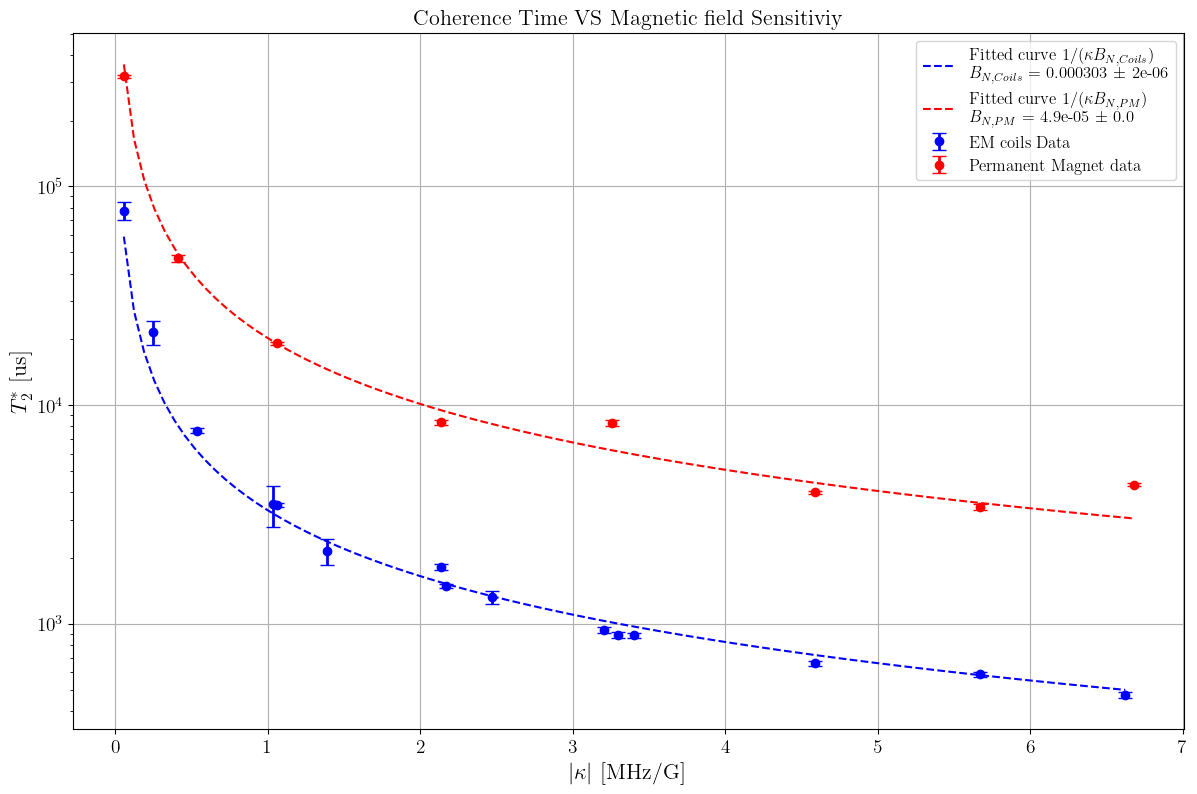

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'

plt.figure(figsize=(12, 8))
# Define the decay model: A / (L + x * B)
def decay_model(x, B):
    return 1 / (x * B)

# Sample data: Replace these with your actual data
x_data = np.abs(np.array(sensitivity_list))
y_data = np.array(T2_eff_list)
sigma_y_data = np.array(sigma_T2_eff_list)

# Ensure all data arrays are 1D
x_data = x_data.flatten()
y_data = y_data.flatten()
sigma_y_data = sigma_y_data.flatten()

# Remove any infinities or NaNs
valid_indices = np.isfinite(x_data) & np.isfinite(y_data) & np.isfinite(sigma_y_data)
x_data_clean = x_data[valid_indices]
y_data_clean = y_data[valid_indices]
sigma_y_data_clean = sigma_y_data[valid_indices]

# Remove any zero or negative sigma values to avoid division by zero
positive_sigma_indices = sigma_y_data_clean > 0
x_data_clean = x_data_clean[positive_sigma_indices]
y_data_clean = y_data_clean[positive_sigma_indices]
sigma_y_data_clean = sigma_y_data_clean[positive_sigma_indices]

# Check if we have enough data points after cleaning
if len(x_data_clean) == 0:
    raise ValueError("No valid data points available after cleaning. Check your data and sigma values.")

# Sort x_data_clean, y_data_clean, and sigma_y_data_clean in decreasing order based on x_data_clean
sorted_indices = np.argsort(x_data_clean)[::-1]  # Sort in decreasing order
x_data_sorted = x_data_clean[sorted_indices]
y_data_sorted = y_data_clean[sorted_indices]
sigma_y_data_sorted = sigma_y_data_clean[sorted_indices]

# Initial guesses for the parameters
initial_guess = [0.0003]

# Perform the curve fitting with WLS
params, covariance = curve_fit(
    decay_model,
    x_data_sorted,
    y_data_sorted,
    p0=initial_guess,
    sigma=sigma_y_data_sorted,
    absolute_sigma=True,
    maxfev=10000  # Increase the maximum number of function evaluations if needed
)

# Extract the fitted parameters
B_fit = params
print(f"\nB = {B_fit}")

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(covariance))
sigma_B_fit = perr
print(f"Parameter uncertainties:\nσ_B = {sigma_B_fit}")

# Generate fitted data
x_data = np.linspace(min(x_data_sorted),max(x_data_sorted),100)
y_fit = decay_model(x_data,B_fit)

# Plot the data and the fit

plt.errorbar(
    x_data_sorted,
    y_data_sorted,
    yerr=sigma_y_data_sorted,
    fmt='o',
    label='EM coils Data',
    color='blue',
    # ecolor='blue',
    elinewidth=2,
    capsize=5
)

plt.plot(x_data, y_fit, 'b--',label= f'Fitted curve $1/(\kappa B_{{N,Coils}})$ \n $B_{{N,Coils}}$ = {np.round(B_fit[0],6)} $\pm$ {np.round(sigma_B_fit[0],6)}')

def decay_model(x, B):
    return 1 / (x * B)

# Sample data: Replace these with your actual data
x_data = np.abs(np.array(sensitivity_list_PM))
y_data = np.array(T2_eff_list_PM)
sigma_y_data = np.array(sigma_T2_eff_list_PM)

# Ensure all data arrays are 1D
x_data = x_data.flatten()
y_data = y_data.flatten()
sigma_y_data = sigma_y_data.flatten()

# Remove any infinities or NaNs
valid_indices = np.isfinite(x_data) & np.isfinite(y_data) & np.isfinite(sigma_y_data)
x_data_clean = x_data[valid_indices]
y_data_clean = y_data[valid_indices]
sigma_y_data_clean = sigma_y_data[valid_indices]

# Remove any zero or negative sigma values to avoid division by zero
positive_sigma_indices = sigma_y_data_clean > 0
x_data_clean = x_data_clean[positive_sigma_indices]
y_data_clean = y_data_clean[positive_sigma_indices]
sigma_y_data_clean = sigma_y_data_clean[positive_sigma_indices]

# Check if we have enough data points after cleaning
if len(x_data_clean) == 0:
    raise ValueError("No valid data points available after cleaning. Check your data and sigma values.")

# Sort x_data_clean, y_data_clean, and sigma_y_data_clean in decreasing order based on x_data_clean
sorted_indices = np.argsort(x_data_clean)[::-1]  # Sort in decreasing order
x_data_sorted = x_data_clean[sorted_indices]
y_data_sorted = y_data_clean[sorted_indices]
sigma_y_data_sorted = sigma_y_data_clean[sorted_indices]

# Initial guesses for the parameters
initial_guess = [0.00003]

# Perform the curve fitting with WLS
params, covariance = curve_fit(
    decay_model,
    x_data_sorted,
    y_data_sorted,
    p0=initial_guess,
    sigma=sigma_y_data_sorted,
    absolute_sigma=True,
    maxfev=10000  # Increase the maximum number of function evaluations if needed
)

# Extract the fitted parameters
B_fit = params
print(f"\nB = {B_fit}")

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(covariance))
sigma_B_fit = perr
print(f"Parameter uncertainties:\nσ_B = {sigma_B_fit}")

# Generate fitted data
x_data = np.linspace(min(x_data_sorted),max(x_data_sorted),100)
y_fit = decay_model(x_data,B_fit)

# Plot the data and the fit

plt.errorbar(
    x_data_sorted,
    y_data_sorted,
    yerr=sigma_y_data_sorted,
    fmt='o',
    label='Permanent Magnet data',
    color='red',
    # ecolor='blue',
    elinewidth=2,
    capsize=5
)

plt.plot(x_data, y_fit, 'r--',label= f'Fitted curve $1/(\kappa B_{{N,PM}})$ \n $B_{{N,PM}}$ = {np.round(B_fit[0],6)} $\pm$ {np.round(sigma_B_fit[0],6)}')


plt.xlabel('$|\kappa|$ [MHz/G]',fontsize=16)
plt.ylabel('$T_2^*$ [us]',fontsize=16)
plt.title('Coherence Time VS Magnetic field Sensitiviy ',fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.yscale('log')
plt.tight_layout()
plt.tick_params(axis='both', labelsize=14)  
plt.savefig('Coherence_vs_kappa_PM_vs_EM.svg')
# plt.xscale('log')
# plt.savefig('T2_vs_kappa_bused_v4.png',dpi = 300)
plt.show()



B = [6.81101474e-05]
Parameter uncertainties:
σ_B = [5.47299622e-07]

B = [1.11127024e-05]
Parameter uncertainties:
σ_B = [8.48127696e-08]


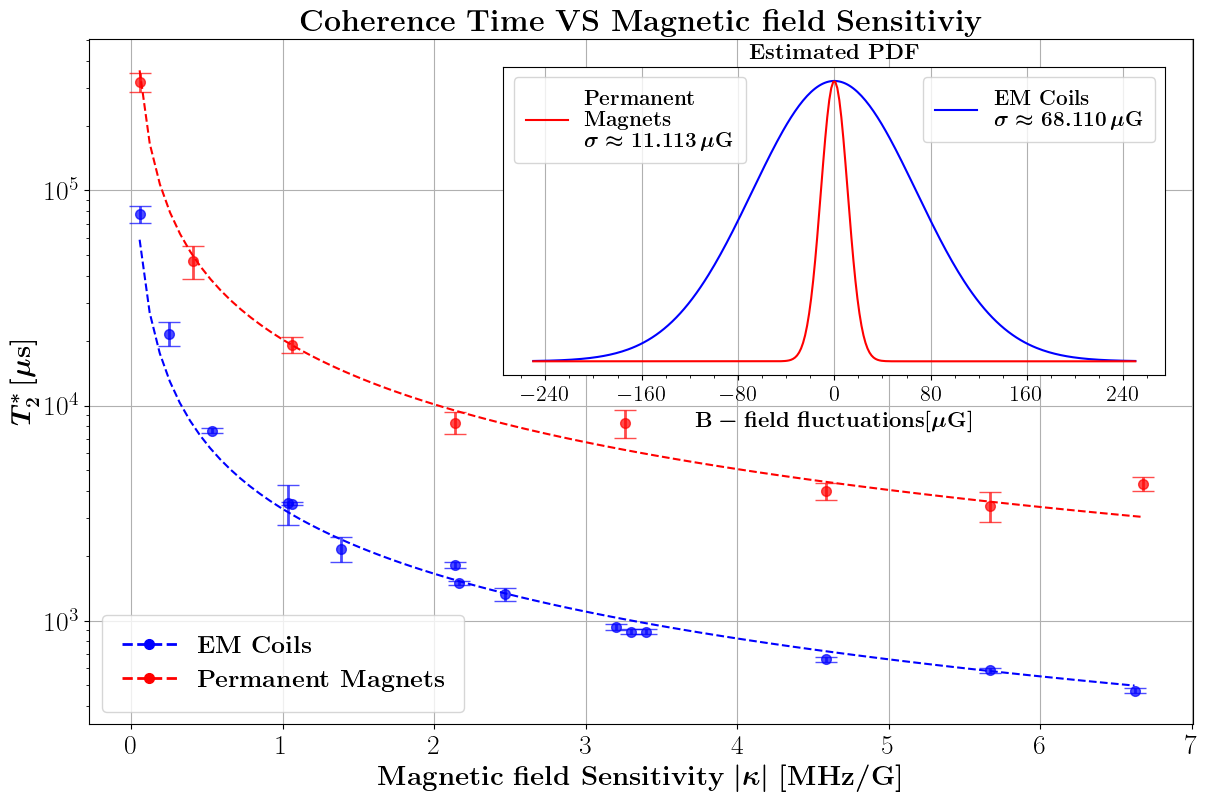

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import MaxNLocator, AutoMinorLocator
import matplotlib.lines as mlines
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'

plt.figure(figsize=(12, 8))
# Define the decay model: A / (L + x * B)
def decay_model(x, B):
    return np.sqrt(2) / (2*np.pi*x * B)

# Sample data: Replace these with your actual data
x_data = np.abs(np.array(sensitivity_list))
y_data = np.array(T2_eff_list)
sigma_y_data = np.array(sigma_T2_eff_list)

# Ensure all data arrays are 1D
x_data = x_data.flatten()
y_data = y_data.flatten()
sigma_y_data = sigma_y_data.flatten()

# Remove any infinities or NaNs
valid_indices = np.isfinite(x_data) & np.isfinite(y_data) & np.isfinite(sigma_y_data)
x_data_clean = x_data[valid_indices]
y_data_clean = y_data[valid_indices]
sigma_y_data_clean = sigma_y_data[valid_indices]

# Remove any zero or negative sigma values to avoid division by zero
positive_sigma_indices = sigma_y_data_clean > 0
x_data_clean = x_data_clean[positive_sigma_indices]
y_data_clean = y_data_clean[positive_sigma_indices]
sigma_y_data_clean = sigma_y_data_clean[positive_sigma_indices]

# Check if we have enough data points after cleaning
if len(x_data_clean) == 0:
    raise ValueError("No valid data points available after cleaning. Check your data and sigma values.")

# Sort x_data_clean, y_data_clean, and sigma_y_data_clean in decreasing order based on x_data_clean
sorted_indices = np.argsort(x_data_clean)[::-1]  # Sort in decreasing order
x_data_sorted = x_data_clean[sorted_indices]
y_data_sorted = y_data_clean[sorted_indices]
sigma_y_data_sorted = sigma_y_data_clean[sorted_indices]

# Initial guesses for the parameters
initial_guess = [0.0003]

# Perform the curve fitting with WLS
params, covariance = curve_fit(
    decay_model,
    x_data_sorted,
    y_data_sorted,
    p0=initial_guess,
    sigma=sigma_y_data_sorted,
    absolute_sigma=True,
    maxfev=10000  # Increase the maximum number of function evaluations if needed
)

# Extract the fitted parameters
B_fit_em = params
print(f"\nB = {B_fit_em}")

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(covariance))
sigma_B_fit = perr
print(f"Parameter uncertainties:\nσ_B = {sigma_B_fit}")

# Generate fitted data
x_data = np.linspace(min(x_data_sorted),max(x_data_sorted),100)
y_fit = decay_model(x_data,B_fit_em)

# Plot the data and the fit

plt.errorbar(
    x_data_sorted,
    y_data_sorted,
    yerr=sigma_y_data_sorted,
    fmt='o',
    label='EM coils Data',
    color='blue',
    # ecolor='blue',
    markersize = 7,
    elinewidth=2,
    capsize=8, alpha = 0.7
)

plt.plot(x_data, y_fit, 'b--',label= f'Fitted curve $1/(\kappa B_{{N,Coils}})$ \n $B_{{N,Coils}}$ = {np.round(B_fit[0],6)} $\pm$ {np.round(sigma_B_fit[0],6)}')

def decay_model(x, B):
    return np.sqrt(2) / (2*np.pi*x * B)

# Sample data: Replace these with your actual data
x_data = np.abs(np.array(sensitivity_list_PM))
y_data = np.array(T2_eff_list_PM)
sigma_y_data = np.array(sigma_T2_eff_list_PM)

# Ensure all data arrays are 1D
x_data = x_data.flatten()
y_data = y_data.flatten()
sigma_y_data = sigma_y_data.flatten()

# Remove any infinities or NaNs
valid_indices = np.isfinite(x_data) & np.isfinite(y_data) & np.isfinite(sigma_y_data)
x_data_clean = x_data[valid_indices]
y_data_clean = y_data[valid_indices]
sigma_y_data_clean = sigma_y_data[valid_indices]

# Remove any zero or negative sigma values to avoid division by zero
positive_sigma_indices = sigma_y_data_clean > 0
x_data_clean = x_data_clean[positive_sigma_indices]
y_data_clean = y_data_clean[positive_sigma_indices]
sigma_y_data_clean = sigma_y_data_clean[positive_sigma_indices]

# Check if we have enough data points after cleaning
if len(x_data_clean) == 0:
    raise ValueError("No valid data points available after cleaning. Check your data and sigma values.")

# Sort x_data_clean, y_data_clean, and sigma_y_data_clean in decreasing order based on x_data_clean
sorted_indices = np.argsort(x_data_clean)[::-1]  # Sort in decreasing order
x_data_sorted = x_data_clean[sorted_indices]
y_data_sorted = y_data_clean[sorted_indices]
sigma_y_data_sorted = sigma_y_data_clean[sorted_indices]

# Initial guesses for the parameters
initial_guess = [0.00003]

# Perform the curve fitting with WLS
params, covariance = curve_fit(
    decay_model,
    x_data_sorted,
    y_data_sorted,
    p0=initial_guess,
    sigma=sigma_y_data_sorted,
    absolute_sigma=True,
    maxfev=10000  # Increase the maximum number of function evaluations if needed
)

# Extract the fitted parameters
B_fit_pm = params
print(f"\nB = {B_fit_pm}")

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(covariance))
sigma_B_fit = perr
print(f"Parameter uncertainties:\nσ_B = {sigma_B_fit}")

# Generate fitted data
x_data = np.linspace(min(x_data_sorted),max(x_data_sorted),100)
y_fit = decay_model(x_data,B_fit_pm)

# Plot the data and the fit

plt.errorbar(
    x_data_sorted,
    y_data_sorted,
    yerr=sigma_y_data_sorted*5,
    fmt='o',
    label='Permanent Magnet data',
    color='red',
    markersize = 7,
    # ecolor='blue',
    elinewidth=2,
    capsize=8, alpha = 0.7
)

plt.plot(x_data, y_fit, 'r--',label= f'Fitted curve $1/(\kappa B_{{N,PM}})$ \n $B_{{N,PM}}$ = {np.round(B_fit[0],6)} $\pm$ {np.round(sigma_B_fit[0],6)}')


plt.xlabel(r'\textbf{Magnetic field Sensitivity} \boldmath$|\kappa|$ \textbf{[MHz/G]}',fontsize=20)
plt.ylabel(r'\boldmath$T_2^* \, [\mu\mathbf{s}]$ ',fontsize=20)
plt.title(r'\textbf{Coherence Time VS Magnetic field Sensitiviy}',fontsize=22)
# plt.legend(fontsize=12, loc = 'lower left')
# legend_xy = (0.33, 0.84)           # ⬅︎ change these 0-1 axes fractions as needed

# leg = plt.legend(
#     bbox_to_anchor=legend_xy,
#     loc='center',
#     fontsize=16,
#     handlelength=2.2,
#     borderpad=0.8
# )

# build composite handles: a marker + dashed line, same colour
em_handle = mlines.Line2D([], [], color='blue', marker='o', linestyle='--',
                          markersize=7, linewidth=2, label=r'\textbf{EM Coils}')
pm_handle = mlines.Line2D([], [], color='red',  marker='o', linestyle='--',
                          markersize=7, linewidth=2, label=r'\textbf{Permanent Magnets}')

legend_xy = (0.33, 0.84)           # tweak as before
legend_xy = (0,0)
leg = plt.legend(handles=[em_handle, pm_handle],
                 bbox_to_anchor=legend_xy,
                 loc='lower left',
                 fontsize=18,
                 handlelength=2.2,
                 borderpad=0.8)

plt.grid(True)
plt.yscale('log')
plt.tight_layout()
plt.tick_params(axis='both', labelsize=20)  

# plt.xscale('log')
# plt.savefig('T2_vs_kappa_bused_v4.png',dpi = 300)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define a Gaussian function
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Sample Gaussian data (replace with actual values if needed)
x_gauss = np.linspace(-0.25, 0.25, 300)
y_gauss1 = gaussian(x_gauss, mu=0, sigma=0.30261/(np.sqrt(2)), A=1)
y_gauss2 = gaussian(x_gauss, mu=0, sigma=4.92267847e-02, A=1)

# Create inset axes
# ax_inset = inset_axes(plt.gca(), width="45%", height="45%", loc='upper right', borderpad=2)
# ax_inset.xaxis.set_major_locator(MaxNLocator(nbins=9))
# ax_inset.xaxis.set_minor_locator(AutoMinorLocator())
# # Plot the two Gaussians
# ax_inset.plot(x_gauss, y_gauss1, label='EM- Coils', color='blue')
# ax_inset.plot(x_gauss, y_gauss2, label='Permanent Magnets', color='red')

# # Customize inset
# ax_inset.set_title(r'\textbf{Estimated PDF}', fontsize=16)
# ax_inset.set_xlabel(r'\textbf{B-Field fluctuations [mG]}', fontsize=16)
# # ax_inset.set_ylabel('Counts', fontsize=8)
# ax_inset.set_yticks([])
# ax_inset.tick_params(axis='both', labelsize=16)
# ax_inset.legend(fontsize=8)
# ax_inset.grid(True)

# Gaussian parameters
sigma_em = 1e6*B_fit_em[0]#/(np.sqrt(2)*np.pi)
sigma_pm = 1e6*B_fit_pm[0]#/(np.sqrt(2)*np.pi)

# inset axes
ax_inset = inset_axes(plt.gca(), width="60%", height="45%", loc='upper right', borderpad=2)
ax_inset.xaxis.set_major_locator(MaxNLocator(nbins=9))
ax_inset.xaxis.set_minor_locator(AutoMinorLocator())

x_gauss = np.linspace(-0.25, 0.25, 300)*1e3
y_gauss1 = np.exp(-0.5*((x_gauss)/sigma_em)**2)
y_gauss2 = np.exp(-0.5*((x_gauss)/sigma_pm)**2)

ax_inset.plot(x_gauss, y_gauss1, color='blue')
ax_inset.plot(x_gauss, y_gauss2, color='red')

ax_inset.set_title(r'\textbf{Estimated PDF}', fontsize=16)
ax_inset.set_xlabel(r'\boldmath$\mathbf{B-field\ fluctuations} [\mu \mathbf{G}]$', fontsize=16)
ax_inset.set_yticks([])
ax_inset.tick_params(axis='both', labelsize=16)
ax_inset.grid(True)

handle_em = mlines.Line2D([], [], color='blue', linestyle='-', label=rf'\textbf{{EM Coils}}' '\n' rf'\boldmath$\sigma\approx{sigma_em:.3f}\,\mu\mathbf{{G}}$')
handle_pm = mlines.Line2D([], [], color='red',  linestyle='-', label=rf'\textbf{{Permanent}}' '\n' rf'\textbf{{Magnets}}' '\n' rf'\boldmath$\sigma\approx{sigma_pm:.3f}\,\mu\mathbf{{G}}$')

leg1 = ax_inset.legend(handles=[handle_em], loc='upper right', fontsize=15, borderpad=0.6)
ax_inset.add_artist(leg1)
ax_inset.legend(handles=[handle_pm], loc='upper left', fontsize=15, borderpad=0.6)

plt.savefig('Coherence_vs_kappa_PM_vs_EM.svg')

plt.show()


In [7]:
%matplotlib widget